<a href="https://colab.research.google.com/github/Su-rose19/Hobby_Projects/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing OpenCV 

In [1]:
 from google.colab.patches import cv2_imshow
 from matplotlib import pyplot as plt
 import cv2
 import sys

Passing the image to detect and cascade names as commandline argument.

In [2]:
#get user supplied values 
imagePath = "/content/sample_data/bts.jpeg"
casePath = "/content/sample_data/haarcascade_frontalface_default.xml"

Now to create the cascade and to intialize it with our face cascade. The cascade is just an XML file that contains the data to detect faces. 
After that, we read the image and convert it to grayscale. Since many operations in OpenCV are done in grayscale.

In [3]:
# create the haar cascade
faceCascade = cv2.CascadeClassifier(casePath)
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#read the image 
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


Now the actual algorithm to detect the ROI, i.e, the face.

In the code, the **detectMultiscale method** is to detect the ROI (face cascade). It takes 5 parameters. The **first parameter** is to say that the input takes in a grayscale image. **scaleFactor** is to compensates those images which were taken closer to the camera.
The detection algorithm uses a moving window to detect object. **minNeighbors** defines how many object are detected near the current one before it declared the face found. **minSize**, on the other hand, gives the size of each window.

*Note: In real life, the values of the window size, scale factor, and so on may differ. So, be sure to experiment a little before you find what works best for you.*

In [6]:
# detect faces in the image
faces = faceCascade.detectMultiScale(gray, 1.12, 7)

The *method* returns a list of rectangles in which it believes it found a face. Next, we will loop over where it thinks it found the object in question.

The **rectangle** method returns 4 values:
(x, y) = the position of the rectangle, and 
(w, h) = the width and height of the rectangle.

Found 7 faces!


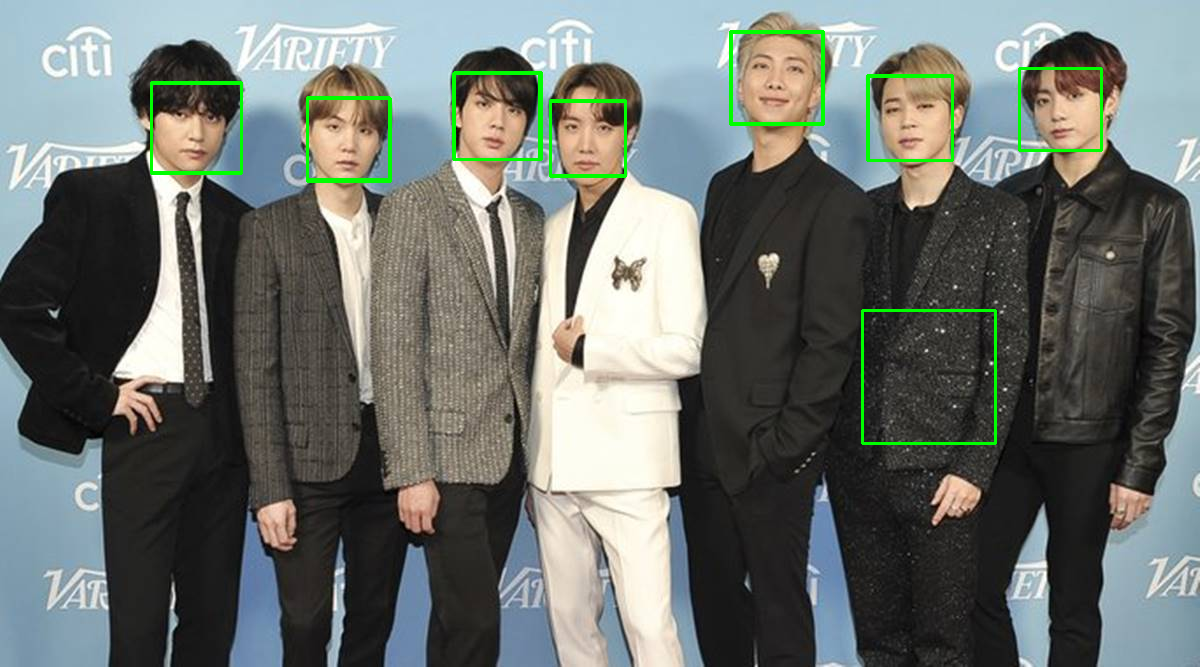

In [9]:
print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  #roi_gray = gray[y:y+h, x:x+w]
  #roi_color = image[y:y+h, x:x+w]
  #eyes = eyeCascade.detectMultiScale(roi_gray)
  #for (ex,ey,ew,eh) in eyes:
   # cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
files = image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()